
# Recreate base step index fiber case with Bragg Exact

Should give same results as implementation in fiberamp and stepexact. (This is the Nufern Yb fiber).

In [1]:
import numpy as np

from fiberamp.fiber.microstruct.bragg import BraggExact
from step_exact import plotlogf, plotlogf_real
from ngsolve.webgui import Draw
from ngsolve import CF
from scipy.optimize import newton


importing NGSolve-6.2.2203-56-g47f483033


In [2]:
n_core = 1.450971
n_clad = 1.4497299206545333


In [3]:
A = BraggExact(ts=[1.25e-5, 2e-5], mats=['core', 'clad'], 
               ns=[lambda x:n_core, lambda x: n_clad],
               maxhs=[.07,.1], wl=.55e-6, scale=1.25e-5)


In [4]:
Draw(CF([n for n in A.ns]), A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [12]:
k_low = A.k0 * A.ns[1] * A.scale
k_high = A.k0 * A.ns[0] * A.scale
outer = 'h1'
nu = 1


In [13]:
k_low, k_high

(207.02094856443617, 207.19817428053798)

<IPython.core.display.Javascript object>


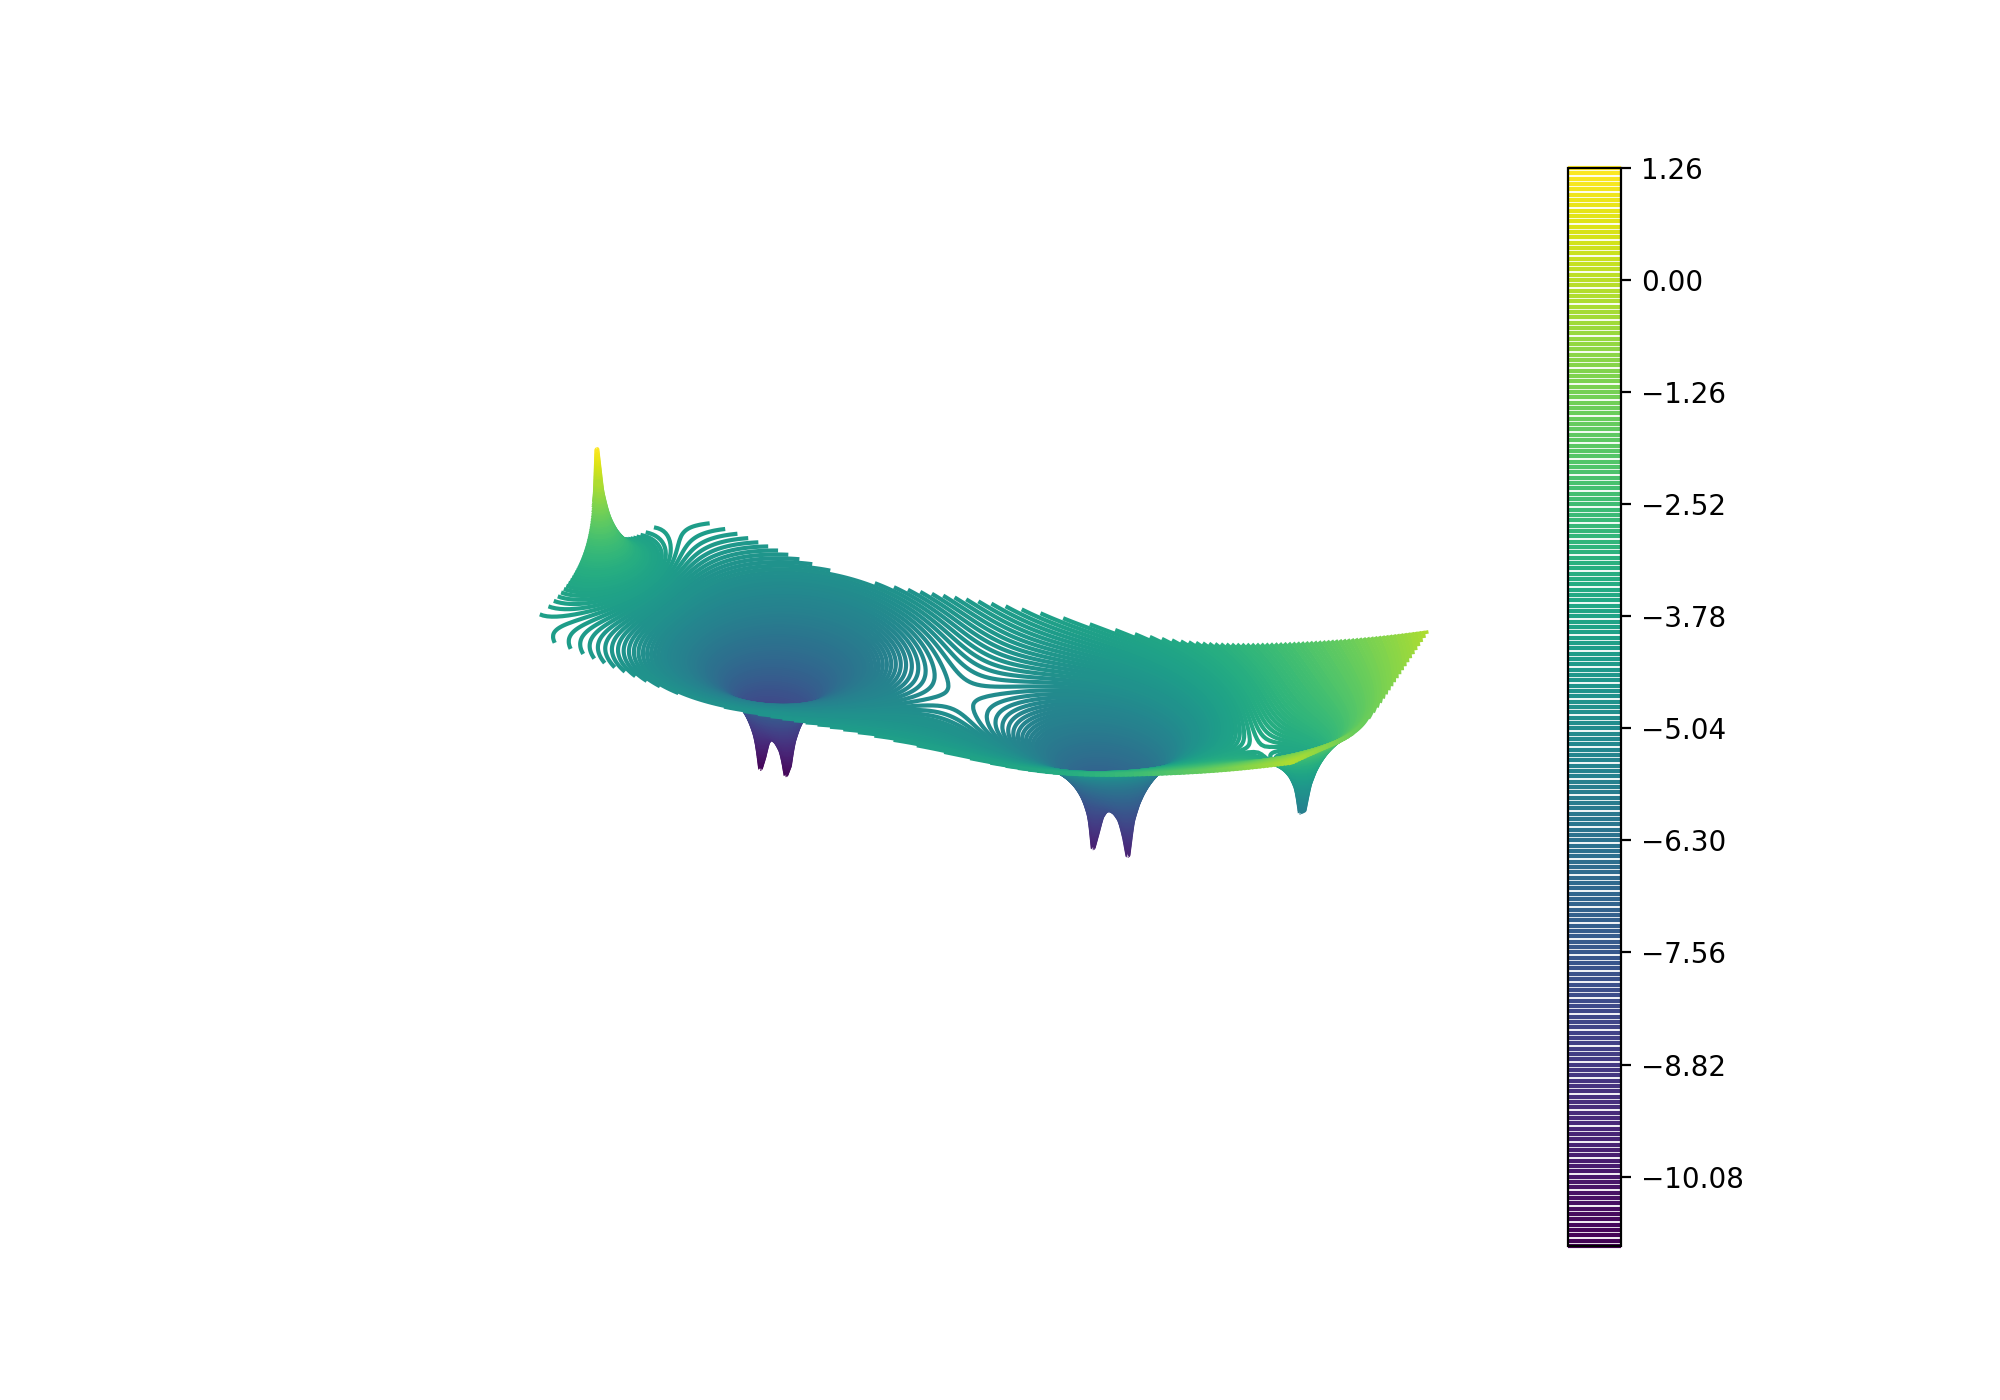

In [14]:
%matplotlib notebook
plotlogf(A.determinant, k_low-.001, k_high+.001, -.03, .03, nu, outer,
         iref=200, rref=200, levels=200, figsize=(10,7), three_D=True)

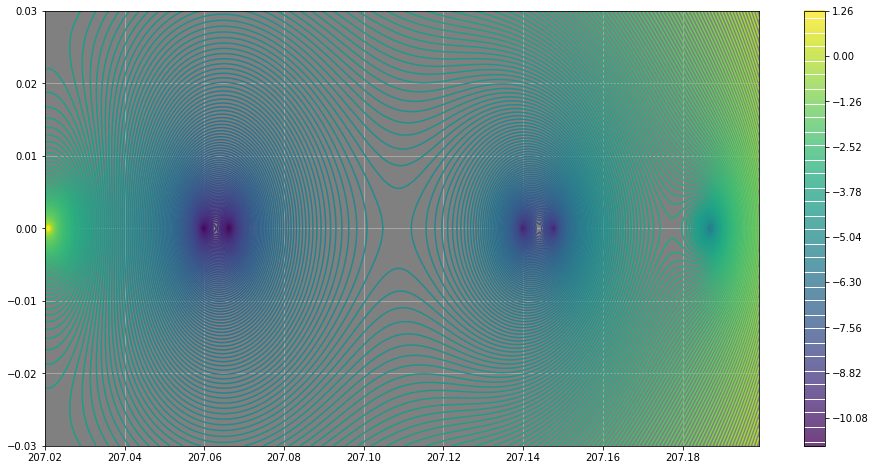

In [15]:
%matplotlib inline
plotlogf(A.determinant, k_low-.001, k_high+.001, -.03, .03, nu, outer,
         iref=200, rref=200, levels=200, figsize=(16,8))

<IPython.core.display.Javascript object>


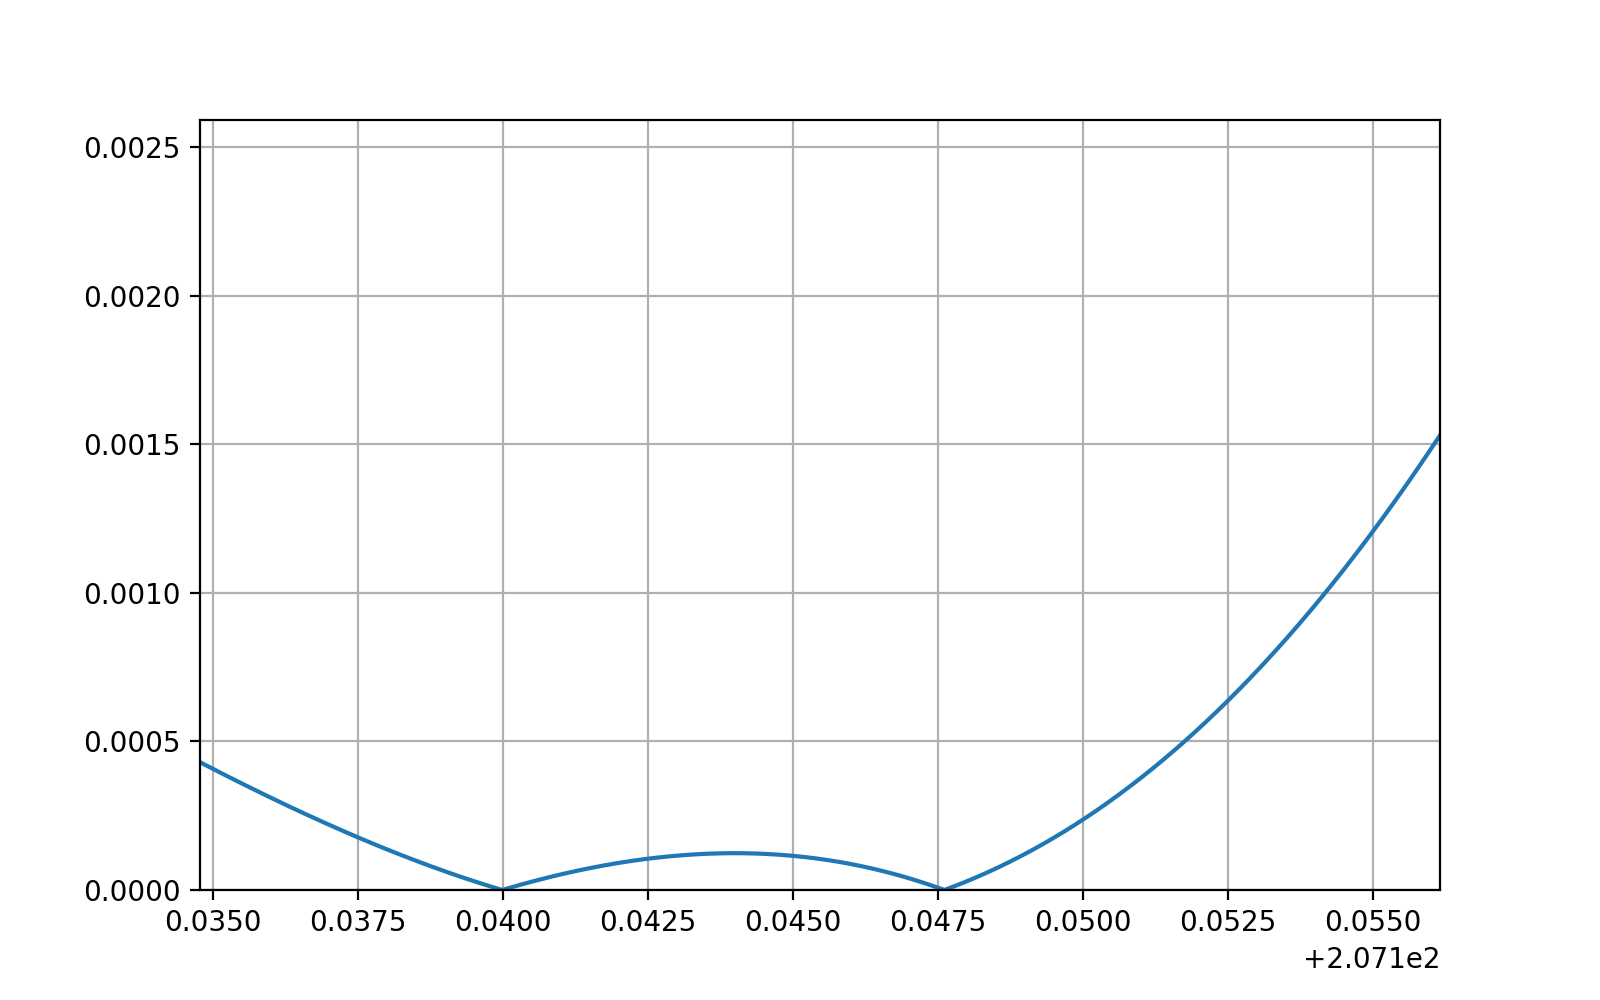

In [16]:
%matplotlib notebook
plotlogf_real(A.determinant, k_low-.01, k_high+.001 , nu, outer, n=10000, figsize=(8,5),
              truncate=True, height=0.05)

In [24]:
guess = np.array(k_low + .815*(k_high-k_low))

beta1 = newton(A.determinant, guess, args=(nu,outer), tol = 1e-15)

print("Scaled beta: ", beta1, ". Residual of determinant: ", abs(A.determinant(beta1, nu, outer)))


Scaled beta:  (207.1476127896517+1.770732545801792e-19j) . Residual of determinant:  2.324204197157176e-15


# Bragg Exact Fields

In [25]:
Fs = A.all_fields(beta1, nu, outer)

In [26]:
Draw(Fs['Ez'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [28]:
Draw(Fs['Hy'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [29]:
Draw(Fs['Ey'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [27]:
Draw(Fs['Hz'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [ ]:
Draw(Fs['Etv'].real, A.mesh, vectors={'grid_size':200})
Draw(Fs['Etv'].imag, A.mesh, vectors={'grid_size':200})


In [ ]:
Draw(Fs['Htv'].real, A.mesh, vectors={'grid_size':200})
Draw(Fs['Htv'].imag, A.mesh, vectors={'grid_size':200})


In [ ]:
Draw(Fs['Ephi'], A.mesh)

In [ ]:
Draw(Fs['Hphi'], A.mesh)

# Using StepExact for comparison

In [ ]:
import numpy as np

from step_exact import StepExact,plotlogf
from ngsolve.webgui import Draw
from ngsolve import CF
from scipy.optimize import newton
from step_exact.param_dicts.n0_params import params

In [ ]:
B = StepExact(params)

In [ ]:
Draw(CF([B.n_core,B.n_clad]), B.mesh)

In [ ]:
k_low = B.k0 * B.n_core * B.scale
k_high = B.k0 * B.n_clad * B.scale
clad = 'h2'
nu = 1
k_low, k_high

In [ ]:
plotlogf(B.hybrid_det, .99*k_low, 1.0001*k_low, -.1,.1, nu, clad,
         iref=100, rref=100, levels=100)

In [ ]:
plotlogf(B.hybrid_det, .995*k_low, k_low, -.025,.025, nu, clad,
         iref=100, rref=100, levels=100)

In [ ]:
guess = np.array(52.325)

beta2 = newton(B.hybrid_det, guess, args=(nu, clad), tol = 1e-15)

print("Scaled beta: ", beta2, ". Residual of determinant: ", abs(B.hybrid_det(beta2, nu, clad)))


In [ ]:
beta1, beta2

# Step Exact Fields

In [ ]:
Fs = B.hybrid_fields(beta1, nu, clad=clad)

In [ ]:
Draw(Fs['Ez'], B.mesh)

In [ ]:
Draw(Fs['Hz'], B.mesh)

In [ ]:
Draw(Fs['Ephi'], B.mesh)

In [ ]:
Draw(Fs['Hphi'], B.mesh)

# Notes:

- It appears that the determinant function is correct for BraggExact in the two layer case: both Step Exact and BraggExact find the same beta.  But I'm not displaying my fields correctly for BraggExact, so the place to look is in the creation of the coefficents and the fields in that class for errors.

- StepExact's eigenfunction has poles where BraggExact does not.  Also appears to have some continuum eigenvalues.  Not yet sure why these don't appear in BraggExact